# Проект: Прогнозирование стоимости жилья в Москве на основе датасета Moscow Housing Price Dataset



# Описание проекта
Мы анализируем датасет [Moscow Housing Price Dataset](https://www.kaggle.com/datasets/egorkainov/moscow-housing-price-dataset), содержащий информацию о ценах на жильё в Москве и его характеристиках (район, площадь, количество комнат и др.). Цель проекта — построить модель машинного обучения для прогнозирования стоимости квартир.

## План работы

### 1. Разведочный анализ (EDA)
- Загрузка и первичный осмотр данных
- Обработка пропусков и аномалий
- Анализ распределения целевой переменной (`price`)
- Исследование корреляции между признаками
- Визуализация ключевых зависимостей:
  - Распределение цен по районам
  - Зависимость цены от площади
  - Влияние этажа на стоимость

### 2. Предобработка данных
- Нормализация числовых признаков
- Кодирование категориальных переменных
- Разделение на обучающую и тестовую выборки

### 3. Построение и оценка моделей
Перед програмной реализацией изучаем и приводим теоретическое обоснование классических подходов ML, которые будут задействованы в нашей работе, после чего мы реализуем и сравним следующие модели:

 - a) Линейная регрессия

 - b) Random Forest

 - c) XGBoost

### 4. Оценка качества моделей
- Сравнение метрик на тестовой выборке
- Анализ остатков моделей
- Интерпретация результатов

### 5. Кластеризация районов по ценам на жильё
Мы реализуем дополнительное исследование с помощью **метода kNN**:
- Нормализация данных о ценах по районам
- Определение оптимального числа кластеров
- Визуализация результатов:
  - **Интерактивная карта Москвы** с цветовой кодировкой кластеров
  - Гистограммы распределения цен в каждом кластере
- Анализ характеристик кластеров:
  - Средняя цена за м²
  - Преобладающий тип жилья
  - Удалённость от центра

## Ожидаемые результаты
1. Анализ факторов, наиболее сильно влияющих на стоимость жилья
2. Рабочая модель прогнозирования цен 
3. Наглядные визуализации распределений и зависимостей
4. Сравнение эффективности разных подходов
5. Интерактивная карта

## Команда
Романовский Илья, Процкая Вера, Серов Кирилл

## Разведочный анализ данных (EDA)

### **Загрузка и первичный осмотр данных**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv/data.csv')

df.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


Первым делом при анализе данных, мы хотим выявить пропуски и аномалии, займемся этим.

In [2]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  object 
 2   Metro station     22676 non-null  object 
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


(22676, 12)

In [3]:
# Проверка на пропуски
print(df.isnull().sum())

# Проверка на полный дубликаты строк
d = df.duplicated().sum()
print(f'Убрано дубликатов: {d}')

# Убираем их
df.drop_duplicates(inplace=True)

Price               0
Apartment type      0
Metro station       0
Minutes to metro    0
Region              0
Number of rooms     0
Area                0
Living area         0
Kitchen area        0
Floor               0
Number of floors    0
Renovation          0
dtype: int64
Убрано дубликатов: 1835


Проверим, что мы все сделали правильно и везде хватает информации.

In [4]:
missing_info = pd.DataFrame({
    'Total Missing': df.isnull().sum(),
    'Percentage Missing': df.isnull().mean() * 100
})
print(missing_info)

                  Total Missing  Percentage Missing
Price                         0                 0.0
Apartment type                0                 0.0
Metro station                 0                 0.0
Minutes to metro              0                 0.0
Region                        0                 0.0
Number of rooms               0                 0.0
Area                          0                 0.0
Living area                   0                 0.0
Kitchen area                  0                 0.0
Floor                         0                 0.0
Number of floors              0                 0.0
Renovation                    0                 0.0


In [5]:
df[df["Number of rooms"]==0].shape

(3236, 12)

Под "ноль-комнатными" квартирами подразумеваются апартаменты: студии и нежилые помещения. В таблице присутсвуют странные предложения, например, 0-комнатная квартира 270 кв метров--нужно удалить подозрительные предложения, оставим апартаменты не больше 50 кв метров.

In [6]:
initial_rows = len(df)
df=df[(df["Number of rooms"] != 0) | ((df["Area"] < 50) & (df["Number of rooms"] == 0))]
df.info()
print(f"Удалено {initial_rows - len(df)} 0-комнатных квартир >50 кв.м")

<class 'pandas.core.frame.DataFrame'>
Index: 20605 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             20605 non-null  float64
 1   Apartment type    20605 non-null  object 
 2   Metro station     20605 non-null  object 
 3   Minutes to metro  20605 non-null  float64
 4   Region            20605 non-null  object 
 5   Number of rooms   20605 non-null  float64
 6   Area              20605 non-null  float64
 7   Living area       20605 non-null  float64
 8   Kitchen area      20605 non-null  float64
 9   Floor             20605 non-null  float64
 10  Number of floors  20605 non-null  int64  
 11  Renovation        20605 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.0+ MB
Удалено 236 0-комнатных квартир >50 кв.м


### **Анализ числовых параметров**

In [7]:
df[['Price', 'Minutes to metro', 'Number of rooms', 'Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors']].describe()


,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,2.060500e+04,20605.000000,20605.000000,20605.000000,20605.000000,20605.000000,20605.000000,20605.000000
mean,3.346417e+07,11.974132,2.063043,69.035053,37.100645,12.341723,9.149041,16.539384
std,7.798553e+07,6.254058,1.480133,62.767808,35.170562,7.384770,7.391082,9.464186
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000
25%,7.050000e+06,7.000000,1.000000,37.000000,17.400000,8.500000,4.000000,11.000000
50%,1.130000e+07,11.000000,2.000000,52.400000,28.100000,10.500000,8.000000,16.000000
75%,2.300000e+07,15.000000,3.000000,75.000000,42.400000,14.200000,13.000000,20.000000
max,2.455020e+09,60.000000,12.000000,1067.400000,541.800000,122.000000,92.000000,97.000000


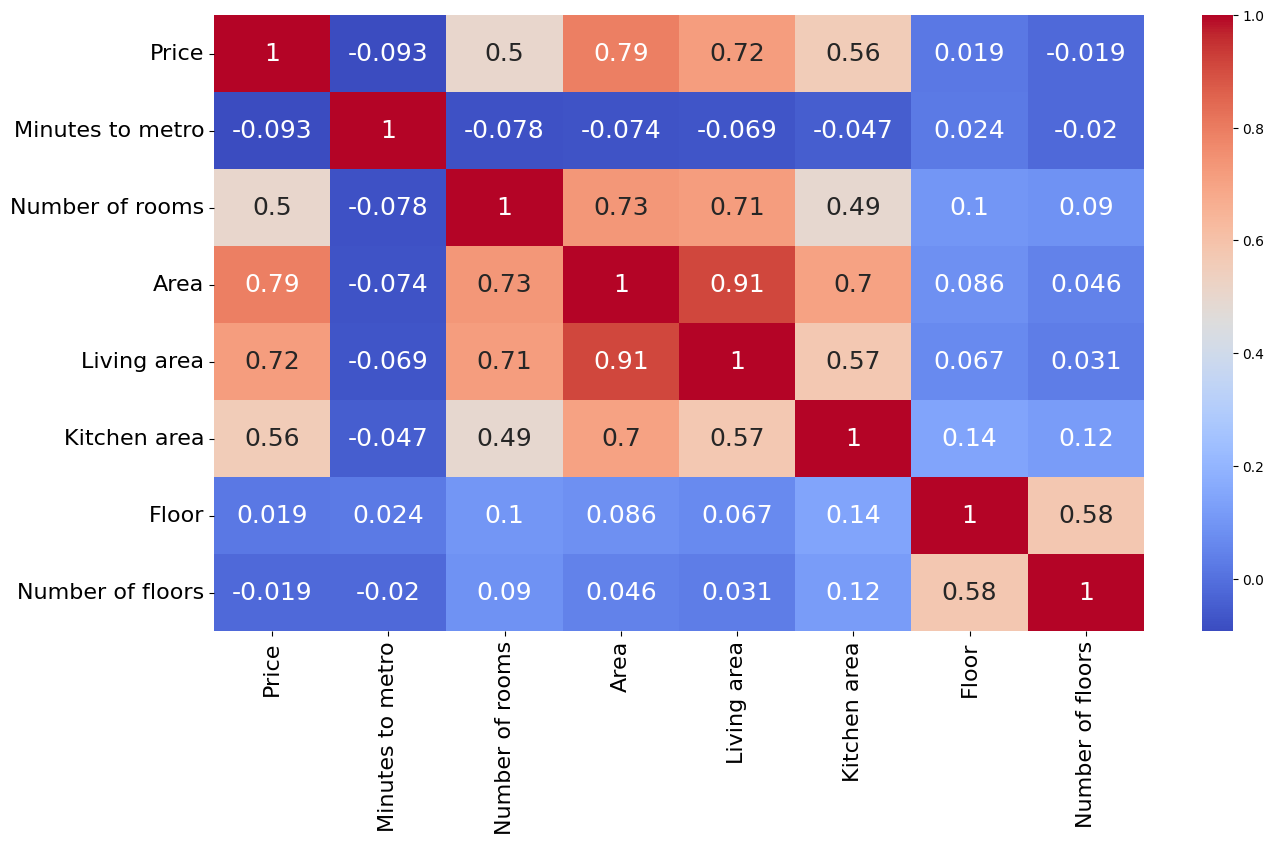

In [ ]:
df_corr = df[['Price', 'Minutes to metro', 'Number of rooms', 'Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors']].corr()

plt.subplots(figsize = (15,8), dpi = 100)
sns.heatmap(df_corr, annot = True, cmap = 'coolwarm', annot_kws={'size': 18})
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

Видим, что Living area, Kitchen area и Area имеют очень высокую корреляцию (что логично), в дальнейшем нам стоит учесть это при обучении моделей

### **Анализ целевой переменной**

In [27]:
df['Price'] = df['Price'] * 1e-6 # cделаем цену в млн рублей
df['Price'].describe()

count    20605.000000
mean        33.464171
std         77.985527
min          1.150000
25%          7.050000
50%         11.300000
75%         23.000000
max       2455.020000
Name: Price, dtype: float64

In [ ]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 *IQR

filtered_df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

print(f"Исходный размер датасета: {len(df)}")
print(f"Размер после удаления выбросов: {len(filtered_df)}")
print(f"Удалено записей: {len(df) - len(filtered_df)}")

Исходный размер датасета: 20605
Размер после удаления выбросов: 17614
Удалено записей: 2991


In [ ]:
filtered_df['Price'].describe()

count    17614.000000
mean        12.644073
std          8.735264
min          1.150000
25%          6.600000
50%          9.919019
75%         15.500000
max         46.900000
Name: Price, dtype: float64

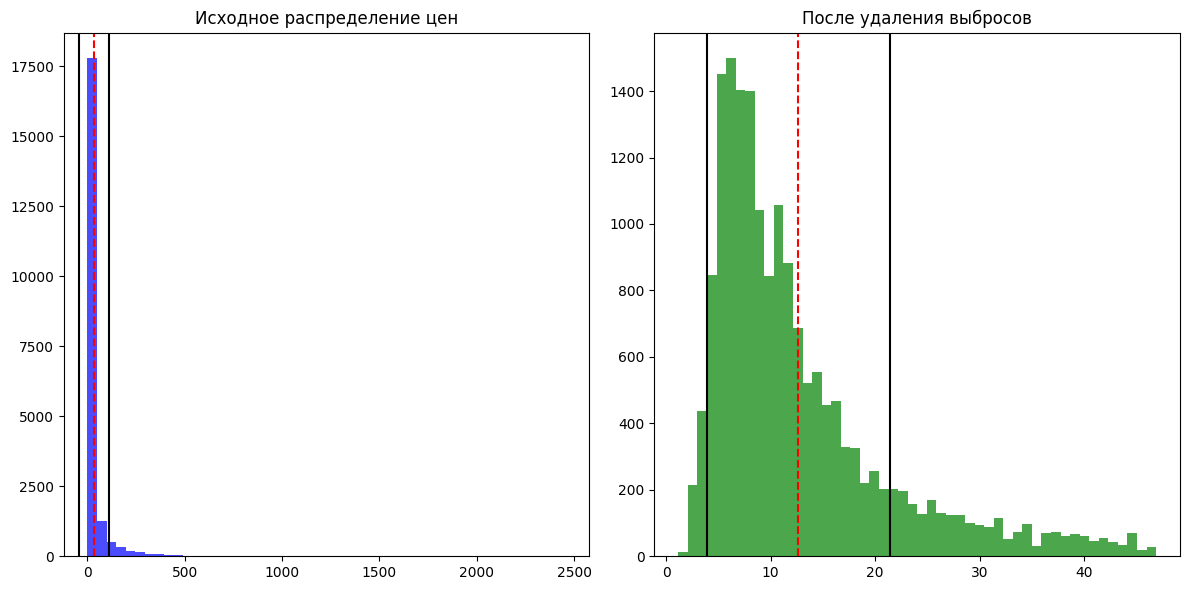

In [ ]:
# Визуализация
plt.figure(figsize=(12, 6))

# Исходные данные
plt.subplot(1, 2, 1)
plt.hist(df['Price'], bins=50, color='blue', alpha=0.7)
plt.axvline(df['Price'].mean(), color='red', linestyle='--')
plt.axvline(df['Price'].mean() + df['Price'].std(), color='black', linestyle='-')
plt.axvline(df['Price'].mean() - df['Price'].std(), color='black', linestyle='-')
plt.title('Исходное распределение цен')

# После фильтрации
plt.subplot(1, 2, 2)
plt.hist(filtered_df['Price'], bins=50, color='green', alpha=0.7)
plt.axvline(filtered_df['Price'].mean(), color='red', linestyle='--')
plt.axvline(filtered_df['Price'].mean() + filtered_df['Price'].std(), color='black', linestyle='-')
plt.axvline(filtered_df['Price'].mean() - filtered_df['Price'].std(), color='black', linestyle='-')
plt.title('После удаления выбросов')

plt.tight_layout()
plt.show()

Рассмотрим топ-10 станций метро по количеству предложений

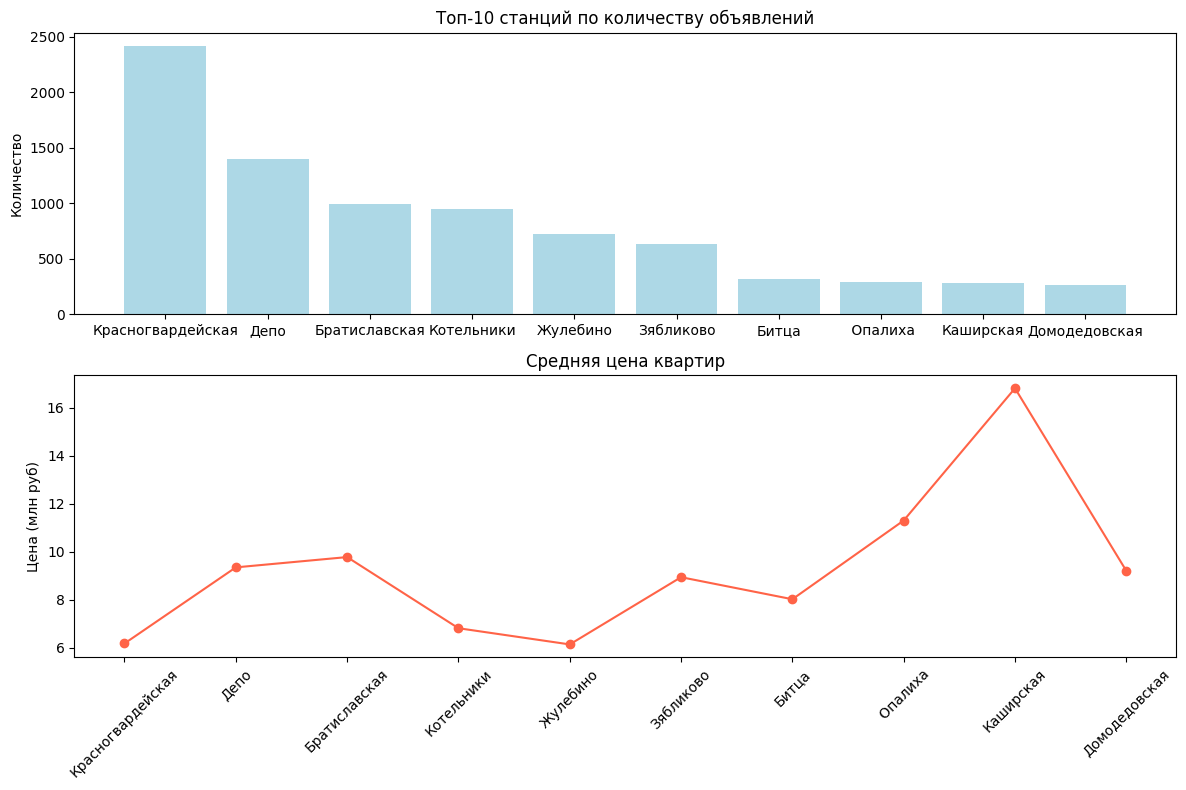

In [ ]:
# Получаем топ-10 станций
top_stations = df['Metro station'].value_counts().nlargest(10)
mean_prices = df[df['Metro station'].isin(top_stations.index)].groupby('Metro station')['Price'].mean()
mean_prices = mean_prices.reindex(top_stations.index)

# Создаем график
plt.figure(figsize=(12, 8))

# График количества объявлений
plt.subplot(2, 1, 1)
plt.bar(top_stations.index, top_stations.values, color='lightblue')
plt.title('Топ-10 станций по количеству объявлений')
plt.ylabel('Количество')

# График средних цен
plt.subplot(2, 1, 2)
plt.plot(mean_prices.index, mean_prices.values, 'o-', color='tomato')
plt.title('Средняя цена квартир')
plt.ylabel('Цена (млн руб)')

# Общие настройки
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


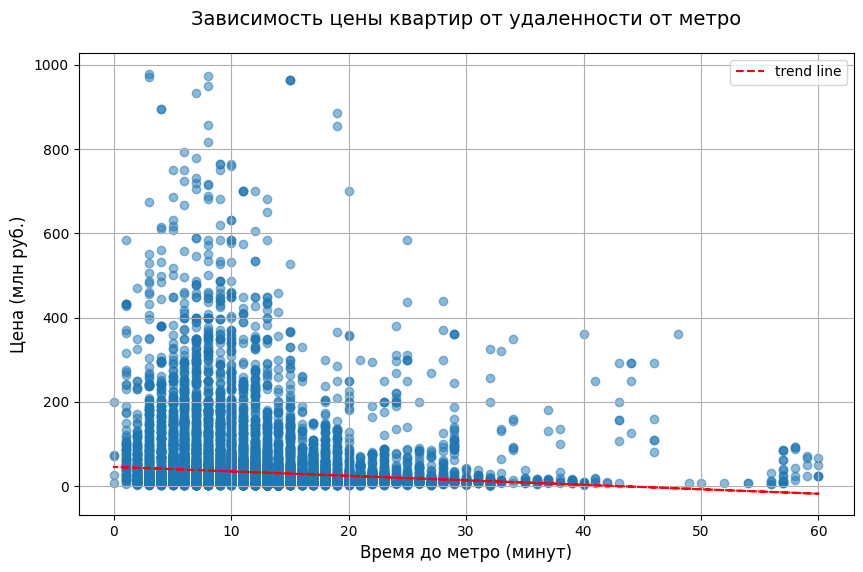

In [ ]:
plt.figure(figsize=(10, 6))
filtered2_df = df[df['Price'] < 1000]
plt.scatter(filtered2_df["Minutes to metro"], filtered2_df["Price"], alpha=0.5)
plt.title('Зависимость цены квартир от удаленности от метро', pad=20, fontsize=14)
plt.xlabel('Время до метро (минут)', fontsize=12)
plt.ylabel('Цена (млн руб.)', fontsize=12)
plt.grid(True)

z = np.polyfit(filtered2_df["Minutes to metro"], filtered2_df["Price"], 1)
p = np.poly1d(z)
plt.plot(filtered2_df["Minutes to metro"], p(filtered2_df["Minutes to metro"]), color='red', linestyle='--', label='trend line')

plt.legend(loc='upper right')

plt.show()

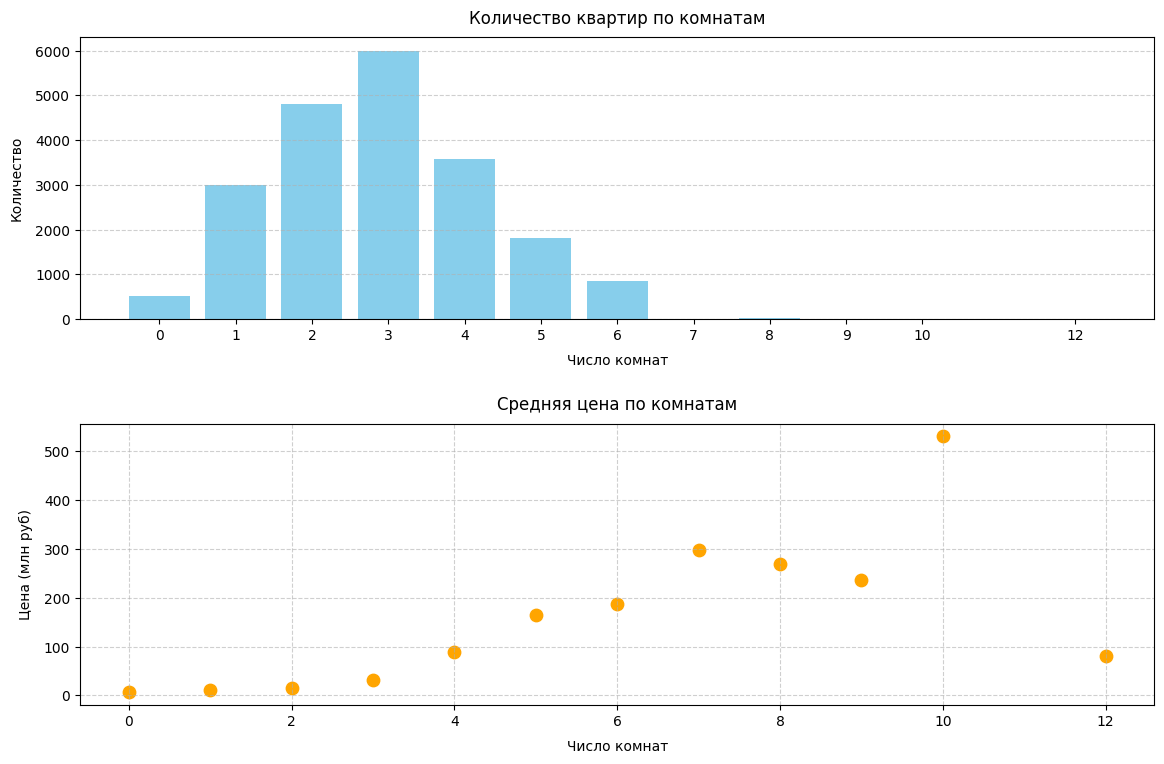

In [ ]:
plt.figure(figsize=(12, 8))

# Первый график (количество квартир)
plt.subplot(2, 1, 1)
plt.bar(df['Number of rooms'].unique(), df['Number of rooms'].value_counts().sort_index(), color='skyblue')
plt.title('Количество квартир по комнатам', pad=10)
plt.xlabel('Число комнат', labelpad=8)
plt.ylabel('Количество', labelpad=8)
plt.xticks(df['Number of rooms'].unique())
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Второй график (цена по комнатам)
plt.subplot(2, 1, 2)
mean_prices_rooms = df.groupby('Number of rooms')['Price'].mean()
plt.scatter(mean_prices_rooms.index, mean_prices_rooms.values, color='orange', s=80)  # Цена в млн
plt.title('Средняя цена по комнатам', pad=10)
plt.xlabel('Число комнат', labelpad=8)
plt.ylabel('Цена (млн руб)', labelpad=8)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(pad=2)
plt.show()




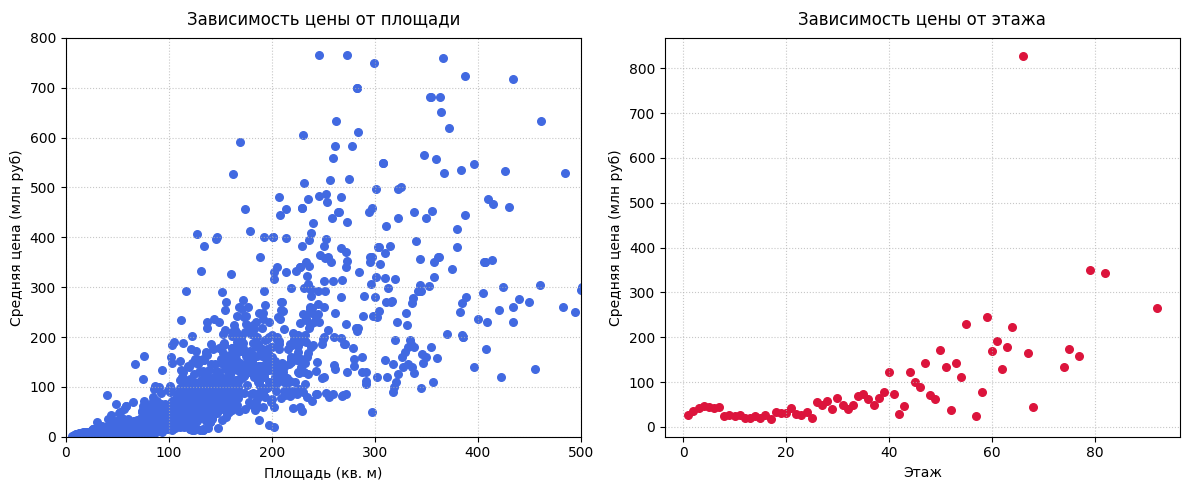

In [ ]:
plt.figure(figsize=(12, 5))

# График зависимости цены от площад
mean_price_area = df.groupby('Area')['Price'].mean()
plt.subplot(1, 2, 1)
plt.scatter(mean_prices_area.index, mean_prices_area.values, color='royalblue', s=30)
plt.title('Зависимость цены от площади', pad=10)
plt.xlabel('Площадь (кв. м)', fontsize=10)
plt.ylabel('Средняя цена (млн руб)', fontsize=10)
plt.xlim(0, 500)
plt.ylim(0, 800)
plt.grid(True, linestyle=':', alpha=0.7)

# График зависимости цены от этажа
plt.subplot(1, 2, 2)
mean_prices_floor = df.groupby('Floor')['Price'].mean()
plt.scatter(mean_prices_floor.index, mean_prices_floor.values, color='crimson', s=30)
plt.title('Зависимость цены от этажа', pad=10)
plt.xlabel('Этаж', fontsize=10)
plt.ylabel('Средняя цена (млн руб)', fontsize=10)
plt.grid(True, linestyle=':', alpha=0.7)

plt.tight_layout()  # Чтобы графики не накладывались
plt.show()


## Подготовка данных

Видим 4 категориальных признака - закодируем их

In [28]:
#обработка выбросов:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR)))]

In [29]:
print(df['Apartment type'].unique())
#print(df['Metro station'].unique())
print(df['Region'].unique())
print(df['Renovation'].unique())

['Secondary' 'New building']
['Moscow region' 'Moscow']
['Cosmetic' 'European-style renovation' 'Without renovation' 'Designer']


In [30]:
# Простое преобразование в 0 и 1
df['Apartment type'] = df['Apartment type'].map({'New building': 1, 'Secondary': 0})
df['Region'] = df['Region'].map({'Moscow': 1, 'Moscow region': 0})

# One-hot encoding для "Renovation"
df = pd.get_dummies(df, columns=['Renovation'])
df = df.drop('Renovation_Without renovation', axis= 1)
# то есть если 0 0 0 в столбцах с ремонтом, то это without renovation

In [31]:
bool_columns = ['Renovation_Cosmetic', 'Renovation_Designer', 'Renovation_European-style renovation']
df[bool_columns] = df[bool_columns].astype(int)

In [32]:
print(f"Всего уникальных станций: {df['Metro station'].nunique()}")
print(df['Metro station'].value_counts().head())  # Топ-5 самых частых

Всего уникальных станций: 505
Metro station
Красногвардейская    2416
Депо                 1394
Братиславская         997
Котельники            952
Жулебино              720
Name: count, dtype: int64


Потом для обучения закодируем категорию metro station методом Frequency Encoding

 каждая категория заменяется частотой её встречаемости в данных (или относительной частотой)

In [33]:
# разделение на тестовую и обучающую выборки
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']               # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Частотное кодирование только на тренировочных данных
metro_freq = X_train['Metro station'].value_counts(normalize=True)
X_train['metro_freq'] = X_train['Metro station'].map(metro_freq)
X_test['metro_freq'] = X_test['Metro station'].map(metro_freq)

In [35]:
# Удаление исходной колонки
X_train.drop('Metro station', axis=1, inplace=True)
X_test.drop('Metro station', axis=1, inplace=True)

In [36]:
mean_freq = metro_freq.mean()
X_test['metro_freq'] = X_test['metro_freq'].fillna(mean_freq)

In [37]:
# 5. Масштабирование признаков (важно для линейной регрессии!)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Построение и оценка моделей

### Линейная регрессия

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

# После предсказания делаем обратное преобразование
y_pred_lr =  lr.predict(X_test)

print(f"Linear Regression R2: {r2_score(y_test, y_pred_lr):.3f}")
print(f"Linear Regression MAE: {mean_absolute_error(y_test, y_pred_lr):.0f} млн. руб.")

Linear Regression R2: 0.770
Linear Regression MAE: 3 млн. руб.


### Случайный лес

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(f"Random Forest R2: {r2_score(y_test, y_pred_rf):.3f}")
print(f"Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf):.4f} млн. руб.")

Random Forest R2: 0.883
Random Forest MAE: 1.5488 млн. руб.


подбор гиперпараметров

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error

# Определяем параметры для поиска
param_grid = {
    'n_estimators': [100, 200],  # Количество деревьевx``
    'max_depth': [None, 5, 10, 20],  # Максимальная глубина
    'min_samples_split': [2, 5],   # Минимальное число образцов для разделения
    'min_samples_leaf': [1, 2],     # Минимальное число образцов в листе
    'max_features': ['sqrt', 'log2']   # Количество признаков для поиска лучшего разделения
}

rf = RandomForestRegressor(random_state=42)

# Используем MAE как метрику для оптимизации
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,  # 5-fold кросс-валидация
    n_jobs=-1,  # Использовать все ядра процессора
    verbose=1
)

# Запускаем подбор параметров
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

# Оценка лучшей модели
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print(f"\nRandom Forest R2: {r2_score(y_test, y_pred_rf):.3f}")
print(f"Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf):.4f} млн. руб.")

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Лучшие параметры: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest R2: 0.886
Random Forest MAE: 1.5457 млн. руб.


### XGBoost

In [21]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print(f"XGBoost R2: {r2_score(y_test, y_pred_xgb):.3f}")
print(f"XGBoost MAE: {mean_absolute_error(y_test, y_pred_xgb):.4f} млн. руб.")

XGBoost R2: 0.886
XGBoost MAE: 1.5507 млн. руб.


подбор гиперпараметров через RandomizedSearchCV, идея точно такая же, но в параметращ ещё явно указываешь сколько случайных кандидатов из всех будут проверены

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),  # от 0.6 до 1.0
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Можно использовать часть данных для ещё большей скорости
random_search.fit(X_train, y_train)

best_xgb = random_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

print(f"XGBoost R2: {r2_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost MAE: {mean_absolute_error(y_test, y_pred_xgb):.4f} млн. руб.")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
XGBoost R2: 0.8970
XGBoost MAE: 1.4480 млн. руб.


In [66]:
print(random_search.best_params_)

{'colsample_bytree': np.float64(0.7693605922825478), 'gamma': np.float64(0.19744075908778486), 'learning_rate': np.float64(0.09804645241541143), 'max_depth': 9, 'n_estimators': 188, 'reg_alpha': np.float64(0.19884240408880516), 'reg_lambda': np.float64(0.71134195274865), 'subsample': np.float64(0.9160702162124823)}


## Сравнение моделей

In [38]:
from sklearn.metrics import mean_squared_error

results = []
for name, model in [('Linear', lr), ('Random Forest', best_rf), ('XGBoost', best_xgb)]:
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred)
    })

pd.DataFrame(results).set_index('Model')

,R2,MAE,RMSE
Model,,,
Linear,0.770417,2.877580,16.894592
Random Forest,0.886288,1.545698,8.367843
XGBoost,0.896955,1.448034,7.582908




RMSE скачет из-за того что есть большие выбросы то есть в квадрате ошибка увеличивается

In [54]:
error_diff = pd.DataFrame({
    'Actual Values': np.array(y_test).flatten(),
    'Predicted Values LR': y_pred_lr.flatten(),
    'Predicted Values RF': y_pred_rf.flatten(),
    'Predicted Values XGB': y_pred_xgb.flatten(),
    })
error_diff.head(10)

,Actual Values,Predicted Values LR,Predicted Values RF,Predicted Values XGB
0,11.800000,11.070156,10.789569,10.319368
1,7.900000,9.589510,8.501246,8.388470
2,5.435900,3.731824,5.451622,5.554478
3,17.700000,20.812878,19.221122,17.412935
4,16.150000,18.814969,17.062765,16.788523
5,12.600000,13.316019,12.396170,12.773029
6,12.162330,17.772533,12.286876,12.618060
7,5.216256,4.013800,5.795728,5.862164
8,10.500000,12.060740,11.551033,12.183806
9,7.810620,12.840940,9.262199,9.149898


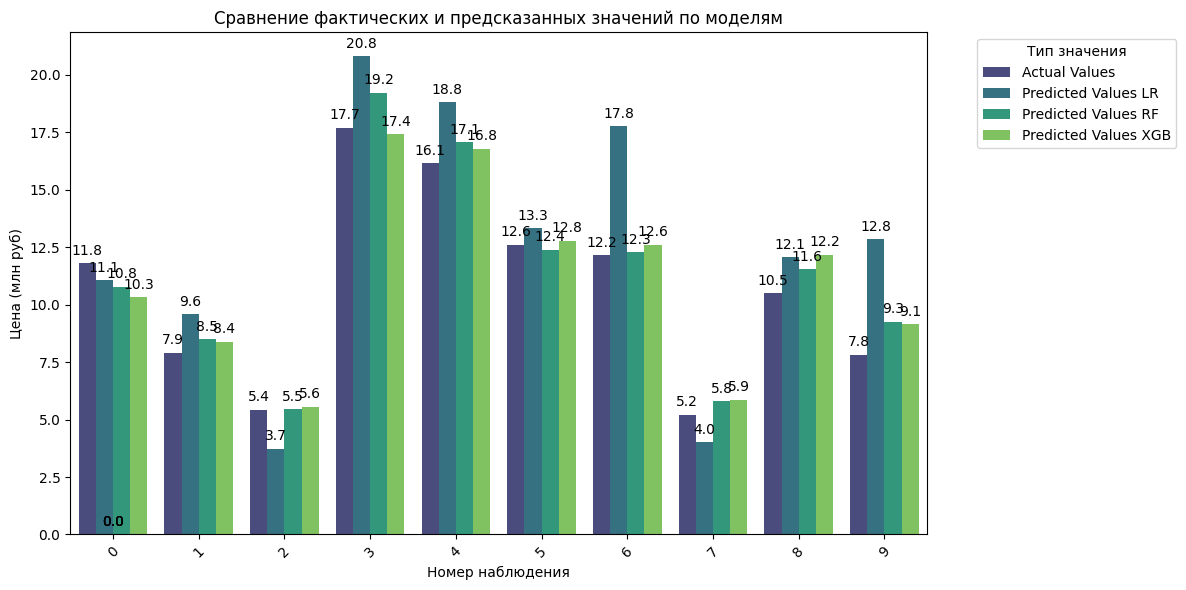

In [ ]:
# Создаем уменьшенную выборку для визуализации (первые 10 строк)
sample = error_diff.head(10).reset_index()

# Преобразуем данные в "длинный" формат для seaborn
melted = sample.melt(id_vars=['index'],
                    value_vars=['Actual Values', 'Predicted Values LR', 'Predicted Values RF', 'Predicted Values XGB'],
                    var_name='Model',
                    value_name='Price')

# Создаем фигуру
plt.figure(figsize=(12, 6))

# Строим barplot
ax = sns.barplot(x='index', y='Price', hue='Model', data=melted, palette='viridis')

# Настройки отображения
plt.title('Сравнение фактических и предсказанных значений по моделям')
plt.xlabel('Номер наблюдения')
plt.ylabel('Цена (млн руб)')
plt.xticks(rotation=45)
plt.legend(title='Тип значения', bbox_to_anchor=(1.05, 1), loc='upper left')

# Добавляем значения на столбцы
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()
plt.show()

Посмотрим без линейной регрессии

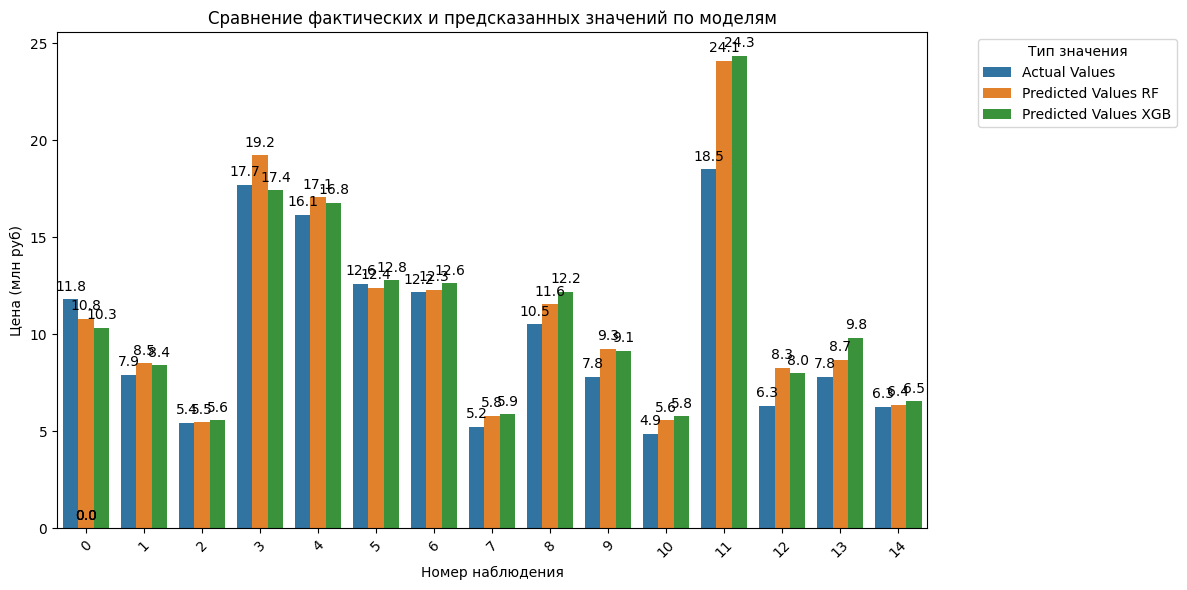

In [ ]:
# Создаем уменьшенную выборку для визуализации (первые 10 строк)
sample = error_diff.head(15).reset_index()
sample.drop('Predicted Values LR', axis= 1)

# Преобразуем данные в "длинный" формат для seaborn
melted = sample.melt(id_vars=['index'],
                    value_vars=['Actual Values', 'Predicted Values RF', 'Predicted Values XGB'],
                    var_name='Model',
                    value_name='Price')

# Создаем фигуру
plt.figure(figsize=(12, 6))

# Строим barplot
ax = sns.barplot(x='index', y='Price', hue='Model', data=melted)

# Настройки отображения
plt.title('Сравнение фактических и предсказанных значений по моделям')
plt.xlabel('Номер наблюдения')
plt.ylabel('Цена (млн руб)')
plt.xticks(rotation=45)
plt.legend(title='Тип значения', bbox_to_anchor=(1.05, 1), loc='upper left')

# Добавляем значения на столбцы
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()
plt.show()

### **Анализ ошибки моделей**

Рассмотрим XGBoost так как он показывает наилучшие результаты

In [58]:

error_diff['Errors'] = error_diff['Actual Values'] - error_diff['Predicted Values XGB'] 
error_xgb = error_diff.drop(['Predicted Values LR', 'Predicted Values RF'], axis=1)
error_xgb


,Actual Values,Predicted Values XGB,Errors
0,11.800000,10.319368,1.480632
1,7.900000,8.388470,-0.488470
2,5.435900,5.554478,-0.118578
3,17.700000,17.412935,0.287065
4,16.150000,16.788523,-0.638523
...,...,...,...
3518,3.922807,4.098524,-0.175717
3519,10.500000,11.607988,-1.107988
3520,10.040109,10.310194,-0.270085
3521,3.884660,3.984360,-0.099700


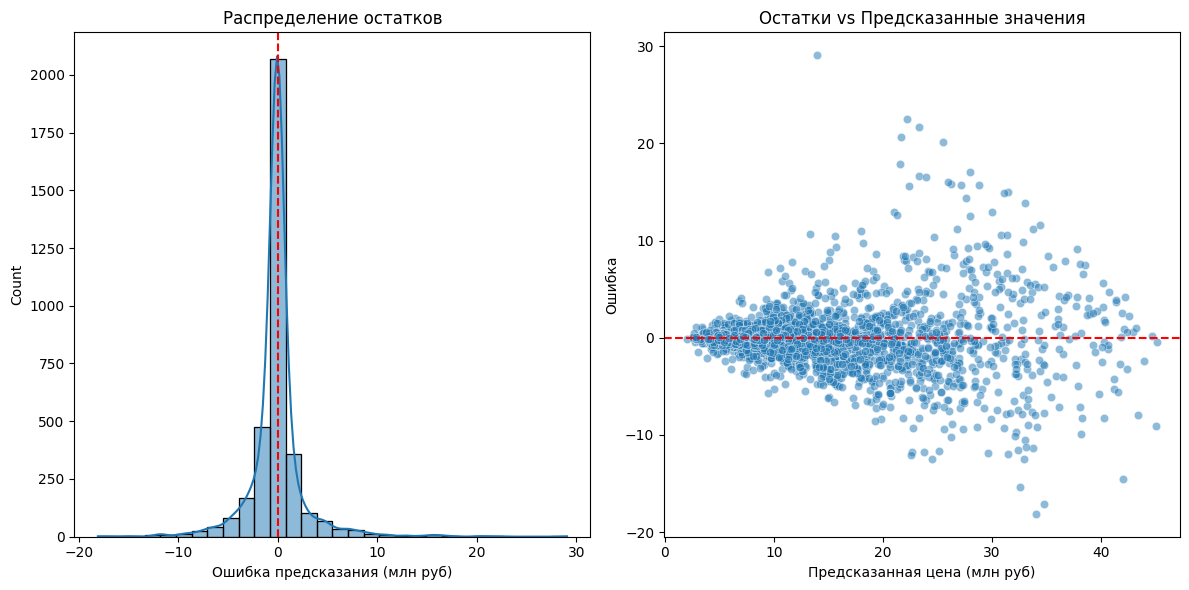


Основные статистики остатков:
count    3523.000000
mean       -0.086530
std         2.752739
min       -18.096558
25%        -0.718738
50%        -0.100205
75%         0.414724
max        29.063137
Name: Errors, dtype: float64

Процент предсказаний с ошибкой ≤ ±1 млн руб: 64.8%

Процент предсказаний с ошибкой ≤ ±3 млн руб: 86.1%
MAPE: 10.2%


In [ ]:
# Гистограмма распределения ошибок
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(error_diff['Errors'], kde=True, bins=30)
plt.title('Распределение остатков')
plt.xlabel('Ошибка предсказания (млн руб)')
plt.axvline(0, color='r', linestyle='--')

# График зависимости ошибок от предсказанных значений
plt.subplot(1, 2, 2)
sns.scatterplot(x='Predicted Values XGB', y='Errors', data=error_diff, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Остатки vs Предсказанные значения')
plt.xlabel('Предсказанная цена (млн руб)')
plt.ylabel('Ошибка')
plt.tight_layout()
plt.show()

# Статистический анализ
print("\nОсновные статистики остатков:")
print(error_diff['Errors'].describe())

# Процент ошибок в пределах ±1 млн руб
within_1m = np.sum(np.abs(error_diff['Errors']) <= 1) / len(error_diff) * 100
print(f"\nПроцент предсказаний с ошибкой ≤ ±1 млн руб: {within_1m:.1f}%")

# Процент ошибок в пределах ±3 млн руб
within_3m = np.sum(np.abs(error_diff['Errors']) <= 3) / len(error_diff) * 100
print(f"\nПроцент предсказаний с ошибкой ≤ ±3 млн руб: {within_3m:.1f}%")


# Средняя абсолютная процентная ошибка (MAPE)
mape = np.mean(np.abs(error_diff['Errors'] / error_diff['Actual Values'])) * 100
print(f"MAPE: {mape:.1f}%")

**Результаты моделей регрессии**

Лучшая модель — **XGBoost**:
- **R² = 0.897** (наибольшая объясненная дисперсия)
- **MAE = 1.45 млн руб** (средняя ошибка в деньгах)
- **RMSE = 7.58 млн руб** (чувствительная к выбросам метрика)

Сравнение производительности:
| Метод           | R²     | MAE (млн руб) | RMSE (млн руб) |
|-----------------|--------|--------------|---------------|
| Linear          | 0.770  | 2.88         | 16.89         |
| Random Forest   | 0.886  | 1.55         | 8.37          |
| **XGBoost**     | **0.897** | **1.45**     | **7.58**      |

Модель XGBoost демонстрирует хорошую точность, предсказывая цены на квартиры с ошибкой ≤ ±1 млн руб в 64,8% случаев, а также показывает умеренную среднюю абсолютную процентную ошибку (MAPE) в 10,2%. Однако наличие выбросов с ошибками до ±29 млн руб указывает на то, что модель может ошибаться на значительные суммы в отдельных случаях, что требует дополнительного анализа и возможной доработки.

## Кластеризация

* Нормализация данных о ценах по районам
* Определение оптимального числа кластеров
* Визуализация результатов:
** Интерактивная карта Москвы с цветовой кодировкой кластеров
** Гистограммы распределения цен в каждом кластере
* Анализ характеристик кластеров:
** Средняя цена за м²
** Преобладающий тип жилья
** Удалённость от центра





Загружаем датасет с данными о квартирах, удаляем строки с пропущенными значениями, оставляем в нашем датасете только нужные для дальнейшей работы столбцы, удаляем выбросы в цене за $м^2$, используя метод интерквартильного размаха (исключаем значения, находящиеся за пределами 1.5 IQR от первой и третьей квартили)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import folium
from IPython.display import display
from geopy.distance import geodesic

df = pd.read_csv("data.csv/data.csv")  # путь к файлу

df = df.dropna()
df['Price_per_m2'] = (df['Price'] / df['Area'])
df = df[['Price_per_m2', 'Metro station', 'Apartment type']]
print(df.head())

# Удаляем выбросы
Q1 = df['Price_per_m2'].quantile(0.25)
Q3 = df['Price_per_m2'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Price_per_m2'] >= Q1 - 3*IQR) & (df['Price_per_m2'] <= Q3 + 3*IQR)]

print(f"Размер датасета после очистки: {df.shape}")

    Price_per_m2 Metro station Apartment type
0  205882.352941       Опалиха      Secondary
1  182926.829268       Павшино      Secondary
2  248098.434004      Мякинино      Secondary
3  236467.236467      Строгино      Secondary
4  171087.533156       Опалиха      Secondary
Размер датасета после очистки: (21865, 3)


Загружаем второй датасет с данными о станциях московского метро. Он пригодится нам для расчета удаленности ближайшего метро от центра, т. к. содержит координаты всех станций.

In [10]:
metro_coords = pd.read_csv('data.csv/metro_stations.csv')
metro_coords = metro_coords[['Russian_name', 'Lat', 'Lon']]
print(metro_coords.head())

             Russian_name      Lat      Lon
0   Бульвар Рокоссовского  55.8147  37.7342
1            Черкизовская  55.8039  37.7447
2  Преображенская площадь  55.7964  37.7150
3              Сокольники  55.7889  37.6803
4          Красносельская  55.7799  37.6673


Объединяем наши датасеты по названию станции, используя inner join. Это нужно для того, чтобы итоговая таблица не содержала пропущенных значений.

In [11]:
df['Metro station'] = df['Metro station'].str.strip()
metro_coords['Russian_name'] = metro_coords['Russian_name'].str.strip()
merged = pd.merge(
    df,
    metro_coords,
    left_on='Metro station',
    right_on='Russian_name',
    how='inner'
)
merged.dropna()
merged = merged.drop('Russian_name', axis = 1)
print(merged.head())
print(f"Размер датасета после джоина: {merged.shape}")

    Price_per_m2  Metro station Apartment type      Lat      Lon
0  248098.434004       Мякинино      Secondary  55.8252  37.3852
1  236467.236467       Строгино      Secondary  55.8038  37.4031
2  300000.000000       Строгино      Secondary  55.8038  37.4031
3  181818.159091      Тушинская      Secondary  55.8267  37.4368
4  315384.615385  Волоколамская      Secondary  55.8354  37.3822
Размер датасета после джоина: (19678, 5)


Вычисляем расстояние от каждой станции метро до центра Москвы

In [12]:
def calc_distance_to_center(row):
    self_coords = (row['Lat'], row['Lon'])
    center_coords = (55.7520, 37.6175)
    return geodesic(self_coords, center_coords).km

merged['metro_distance_to_center'] = merged.apply(calc_distance_to_center, axis=1)
merged[['Metro station', 'metro_distance_to_center']].head()

,Metro station,metro_distance_to_center
0,Мякинино,16.696984
1,Строгино,14.637673
2,Строгино,14.637673
3,Тушинская,14.059435
4,Волоколамская,17.437133


In [13]:
print(merged.isnull().sum())

Price_per_m2                0
Metro station               0
Apartment type              0
Lat                         0
Lon                         0
metro_distance_to_center    0
dtype: int64


Нормализуем признаки, т. к. метод K-means чувствителен к масштабу данных.

In [14]:
X = merged[['Price_per_m2', 'metro_distance_to_center']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])

[[-0.40400507  0.86344296]
 [-0.46153329  0.49205023]
 [-0.14729854  0.49205023]
 [-0.73182908  0.38776605]
 [-0.07120582  0.99692751]]


Определяем оптимальное количество кластеров с помощью метода локтя и оцениваем качество кластеризации для разных количеств кластеров с помощью Silhouette Score.

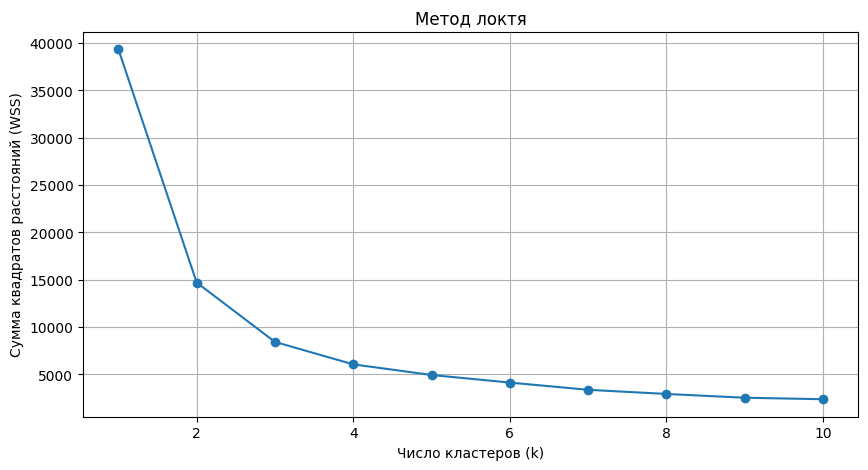

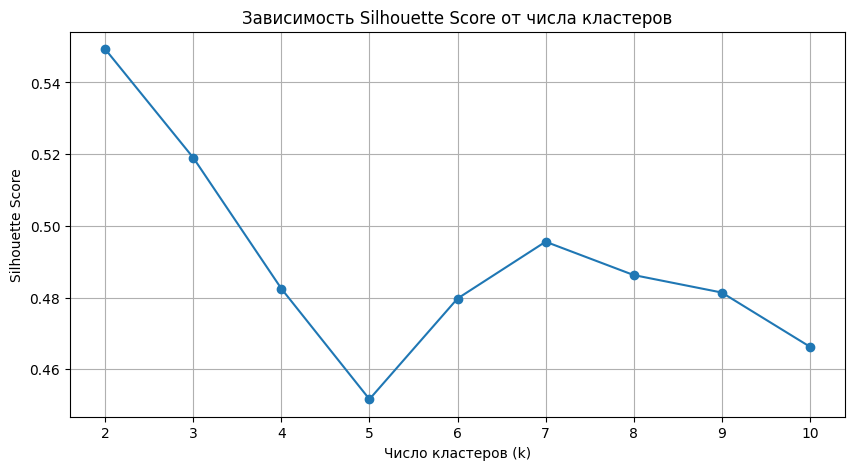

In [15]:
# Метод локтя
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wss, marker='o')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Сумма квадратов расстояний (WSS)')
plt.title('Метод локтя')
plt.grid()
plt.show()

# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Silhouette Score')
plt.title('Зависимость Silhouette Score от числа кластеров')
plt.grid()
plt.show()

На верхнем графике видим, что "локоть" находится в точке 3: после него WCSS перестает существенно уменьшаться.
На нижнем графике видно, что при значении $k = 3$ Silhouette Score выше, чем при больших $k$. Меньшее же количество кластеров, то есть 2, брать бессмысленно, это будет неинформативно для нашей задачи.

Проводим кластеризацию методом k-means c количеством кластеров 3 по признакам цены за квадратный метр и удаленностью от центра, строим визуализацию.

cluster
1    9364
0    7488
2    2826
Name: count, dtype: int64


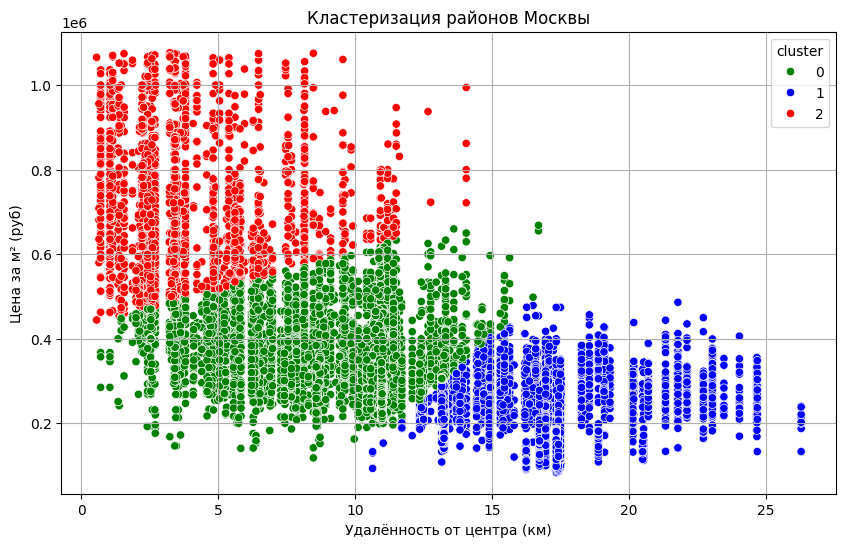

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
merged['cluster'] = kmeans.fit_predict(X_scaled)

#Посмотрим на распределения наших кластеров
print(merged['cluster'].value_counts())

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged, x='metro_distance_to_center', y='Price_per_m2', hue='cluster', palette=['green', 'blue', 'red'])
plt.title('Кластеризация районов Москвы')
plt.xlabel('Удалённость от центра (км)')
plt.ylabel('Цена за м² (руб)')
plt.grid()
plt.show()

Создаем интерактивную карту Москвы с отметками станций метро.

In [18]:
moscow_map = folium.Map(location=[55.75, 37.61], zoom_start=11)

colors = {0: 'green', 1: 'blue', 2: 'red'}
merged['avg_price_per_station'] = merged.groupby('Metro station')['Price_per_m2'].transform('mean')
merged['apartment_count_per_station'] = merged.groupby('Metro station')['Price_per_m2'].transform('count')
for _, row in merged.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Lon']],
        radius=5,
        color=colors[row['cluster']],
        fill=True,
        tooltip=f"Метро: {row['Metro station']}<br>Цена: {round(row['avg_price_per_station']/1000)} тыс руб/м²<br>Удаленность от центра: {round(row['metro_distance_to_center'])} км<br>Количество квартир: {row['apartment_count_per_station']}"
    ).add_to(moscow_map)

moscow_map.save('moscow_clusters.html')
#display(moscow_map)

# можно скачать ipynb и запустить c display, можно открыть html 

Строим гистограммы распределений цен за квадратный метр и удаленности от центра.

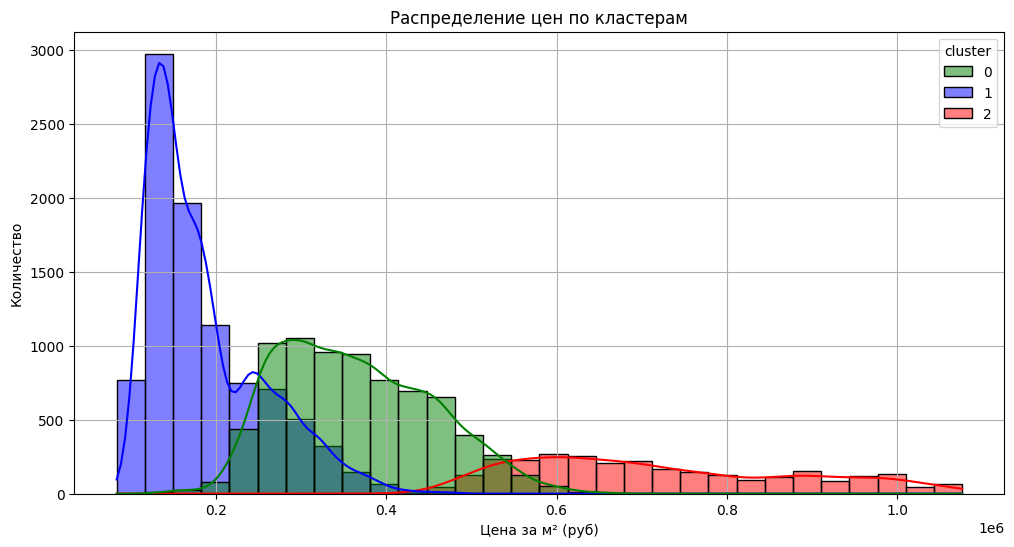

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(data=merged, x='Price_per_m2', hue='cluster', bins=30, kde=True, palette=['green', 'blue', 'red'])
plt.title('Распределение цен по кластерам')
plt.xlabel('Цена за м² (руб)')
plt.ylabel('Количество')
plt.grid()
plt.show()

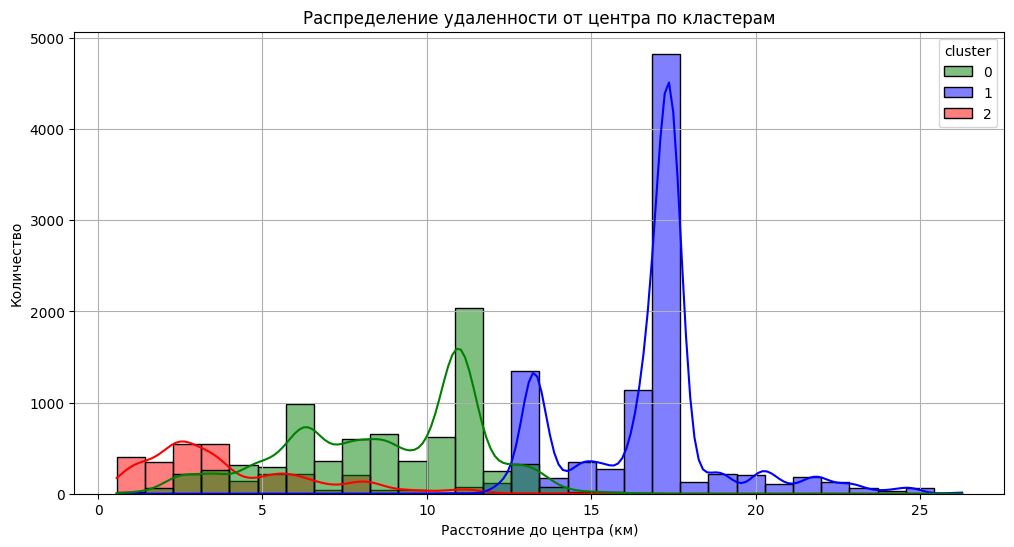

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(data=merged, x='metro_distance_to_center', hue='cluster', bins=30, kde=True, palette=['green', 'blue', 'red'])
plt.title('Распределение удаленности от центра по кластерам')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Количество')
plt.grid()
plt.show()

Проводим анализ каждого кластера на основе цены за квадратный метр, удаленности от метро и преобладающего типа жилья.

In [34]:
cluster_stats = round(merged.groupby('cluster').agg({
    'Price_per_m2': ['mean', 'median', 'min', 'max', 'count'],
    'metro_distance_to_center': 'mean',
    'Apartment type': lambda x: x.mode()[0]
}).reset_index())
cluster_stats = cluster_stats.rename(columns={'<lambda>': 'Predominant type'})
cluster_stats.head()


cluster Price_per_m2                                       \
                  mean    median       min        max count   
0       0     363929.0  353482.0  118243.0   668348.0  7488   
1       1     185336.0  164467.0   83150.0   486216.0  9364   
2       2     717923.0  685871.0  444444.0  1076520.0  2826   

  metro_distance_to_center   Apartment type  
                      mean Predominant type  
0                      9.0        Secondary  
1                     17.0     New building  
2                      4.0        Secondary

### Анализ кластеров
На основе полученных характеристик кластеров мы можем описать каждый из них:


1.   **0 кластер:** Средний ценовой сегмент, компромисс между удаленностью от центра и стоимостью квадратного метра, преобладающий тип жилья - вторичка
2.   **1 кластер:** Дешевое жилье на окраинах в основном в новостройках, самый популярный кластер
3.   **2 кластер:** Дорогие элитные квартиры в историческом центре города

